<a href="https://colab.research.google.com/github/JakeOh/20230228_itwill_java140_lab_python/blob/main/py20_movielens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 패키지 임포트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Movielens 데이터셋

*  GitHub: https://github.com/wesm/pydata-book/tree/3rd-edition/datasets/movielens
*  movies.dat
    *  MovieID::Title::Genres
*  ratings.dat
    *  UserID::MovieID::Rating::Timestamp
*  users.dat
    *  UserID::Gender::Age::Occupation::Zip-code
*  모든 데이터 파일은 첫번째 줄부터 데이터가 작성되어져 있음. 컬럼 이름이 파일에 포함되어 있지 않음.

In [2]:
# movies 데이터프레임의 컬럼 이름들
movies_cols = ['movie_id', 'title', 'genres']
# ratings 데이터프레임의 컬럼 이름들
ratings_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
# users 데이터프레임의 컬럼 이름들
users_cols = ['user_id', 'gender', 'age', 'occupation', 'zip_code']

## movies 데이터셋

In [3]:
movies_file = 'https://github.com/wesm/pydata-book/raw/3rd-edition/datasets/movielens/movies.dat'

In [7]:
# movies.dat 파일을 읽어서 DataFrame 생성:
movies = pd.read_csv(movies_file,        # 파일 경로
                     sep='::',           # csv 파일의 값(value) 구분자(seperator)
                     names=movies_cols,  # DF의 컬럼 이름
                     engine='python')    # warning을 제거하기 위해서

In [8]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [10]:
movies.tail()

,movie_id,title,genres
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama|Thriller


### 장르 분석

*  특정 장르에 해당하는 영화 개수 - (예) Animation
*  어떤 장르의 영화가 가장 많은 지.

In [11]:
# Animation 장르의 영화 찾기
animations = movies[movies.genres.str.contains('Animation')]

In [13]:
animations.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
12,13,Balto (1995),Animation|Children's
47,48,Pocahontas (1995),Animation|Children's|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children's|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children's


In [14]:
animations.tail()

,movie_id,title,genres
3690,3759,Fun and Fancy Free (1947),Animation|Children's|Musical
3706,3775,Make Mine Music (1946),Animation|Children's|Musical
3707,3776,Melody Time (1948),Animation|Children's|Musical
3730,3799,Pokémon the Movie 2000 (2000),Animation|Children's
3875,3945,Digimon: The Movie (2000),Adventure|Animation|Children's


In [15]:
animations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 3875
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  105 non-null    int64 
 1   title     105 non-null    object
 2   genres    105 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.3+ KB


In [16]:
# 로맨틱 코미디 장르
romantic_comedies = movies[movies.genres.str.contains('Romance') &
                           movies.genres.str.contains('Comedy')]

In [17]:
romantic_comedies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 2 to 3839
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  204 non-null    int64 
 1   title     204 non-null    object
 2   genres    204 non-null    object
dtypes: int64(1), object(2)
memory usage: 6.4+ KB


In [18]:
romantic_comedies.head()

,movie_id,title,genres
2,3,Grumpier Old Men (1995),Comedy|Romance
6,7,Sabrina (1995),Comedy|Romance
10,11,"American President, The (1995)",Comedy|Drama|Romance
38,39,Clueless (1995),Comedy|Romance
63,64,Two if by Sea (1996),Comedy|Romance


In [19]:
romantic_comedies.tail()

,movie_id,title,genres
3679,3748,"Match, The (1999)",Comedy|Romance
3759,3829,Mad About Mambo (2000),Comedy|Romance
3804,3874,"Couch in New York, A (1996)",Comedy|Romance
3815,3885,Love & Sex (2000),Comedy|Romance
3839,3909,Woman on Top (2000),Comedy|Romance


*  가장 빈번한 장르?
*  장르 빈도수 순서?

In [20]:
movies.genres.value_counts()

Drama                                  843
Comedy                                 521
Horror                                 178
Comedy|Drama                           162
Comedy|Romance                         142
                                      ... 
Action|Comedy|Crime|Horror|Thriller      1
Action|Drama|Thriller|War                1
Action|Adventure|Children's              1
Action|Adventure|Children's|Fantasy      1
Adventure|Crime|Sci-Fi|Thriller          1
Name: genres, Length: 301, dtype: int64

In [22]:
# 리스트 메서드: append vs extend
a = []
a.append([1, 2])
print(a)
a.append([3, 4])
print(a)

b = []
b.extend([1, 2])
print(b)
b.extend([3, 4])
print(b)

[[1, 2]]
[[1, 2], [3, 4]]
[1, 2]
[1, 2, 3, 4]


In [24]:
genres = []  # 각 영화이 장르를 저장할 리스트
for s in movies.genres:
    # print(s.split('|'))
    genres.extend(s.split('|'))

In [26]:
print(genres)

['Animation', "Children's", 'Comedy', 'Adventure', "Children's", 'Fantasy', 'Comedy', 'Romance', 'Comedy', 'Drama', 'Comedy', 'Action', 'Crime', 'Thriller', 'Comedy', 'Romance', 'Adventure', "Children's", 'Action', 'Action', 'Adventure', 'Thriller', 'Comedy', 'Drama', 'Romance', 'Comedy', 'Horror', 'Animation', "Children's", 'Drama', 'Action', 'Adventure', 'Romance', 'Drama', 'Thriller', 'Drama', 'Romance', 'Thriller', 'Comedy', 'Action', 'Action', 'Comedy', 'Drama', 'Crime', 'Drama', 'Thriller', 'Thriller', 'Drama', 'Sci-Fi', 'Drama', 'Romance', 'Drama', 'Drama', 'Romance', 'Adventure', 'Sci-Fi', 'Drama', 'Drama', 'Drama', 'Sci-Fi', 'Adventure', 'Romance', "Children's", 'Comedy', 'Drama', 'Drama', 'Romance', 'Drama', 'Documentary', 'Comedy', 'Comedy', 'Romance', 'Drama', 'Drama', 'War', 'Action', 'Crime', 'Drama', 'Drama', 'Action', 'Adventure', 'Comedy', 'Drama', 'Drama', 'Romance', 'Crime', 'Thriller', 'Animation', "Children's", 'Musical', 'Romance', 'Drama', 'Romance', 'Crime', 'Th

In [29]:
pd.Series(genres).value_counts()

Drama          1603
Comedy         1200
Action          503
Thriller        492
Romance         471
Horror          343
Adventure       283
Sci-Fi          276
Children's      251
Crime           211
War             143
Documentary     127
Musical         114
Mystery         106
Animation       105
Fantasy          68
Western          68
Film-Noir        44
dtype: int64

In [27]:
genre_counts = pd.value_counts(genres)
genre_counts

Drama          1603
Comedy         1200
Action          503
Thriller        492
Romance         471
Horror          343
Adventure       283
Sci-Fi          276
Children's      251
Crime           211
War             143
Documentary     127
Musical         114
Mystery         106
Animation       105
Fantasy          68
Western          68
Film-Noir        44
dtype: int64

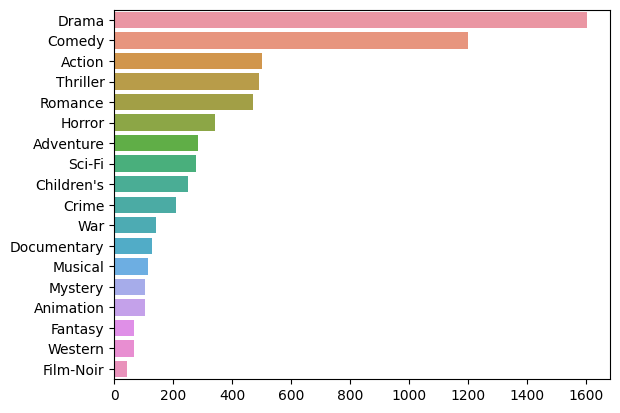

In [30]:
# 장르 빈도수 시각화
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.show()

### 연도별 영화 수

In [31]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [41]:
movies['year'] = movies.title.str[-5:-1].astype('int')

In [42]:
movies.head()

,movie_id,title,genres,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [43]:
movies.tail()

,movie_id,title,genres,year
3878,3948,Meet the Parents (2000),Comedy,2000
3879,3949,Requiem for a Dream (2000),Drama,2000
3880,3950,Tigerland (2000),Drama,2000
3881,3951,Two Family House (2000),Drama,2000
3882,3952,"Contender, The (2000)",Drama|Thriller,2000


In [44]:
year_counts = movies.year.value_counts()
year_counts

1996    345
1995    342
1998    337
1997    315
1999    283
       ... 
1923      3
1919      3
1922      2
1920      2
1921      1
Name: year, Length: 81, dtype: int64

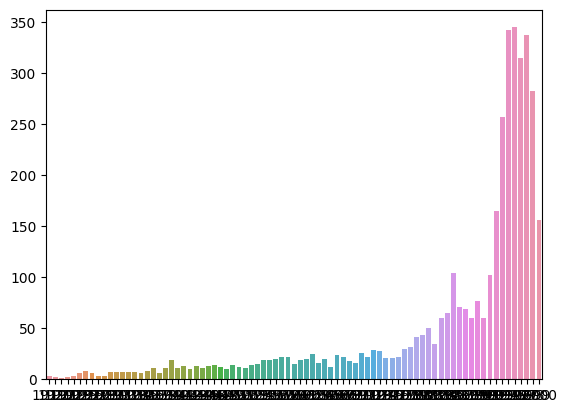

In [45]:
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.show()

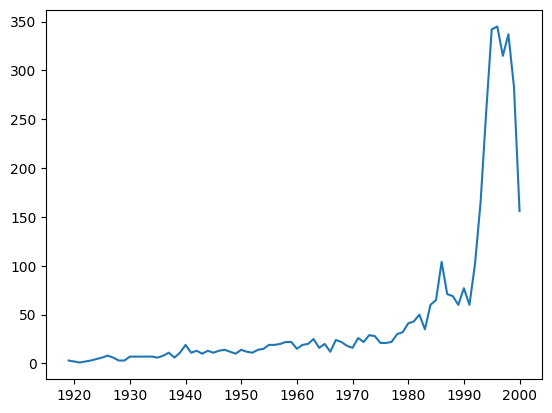

In [46]:
sns.lineplot(x=year_counts.index, y=year_counts.values)
plt.show()

## users 데이터셋

In [47]:
users_file = 'https://github.com/wesm/pydata-book/raw/3rd-edition/datasets/movielens/users.dat'

In [48]:
users = pd.read_csv(users_file,
                    sep='::',
                    names=users_cols,
                    engine='python')

In [49]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zip_code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [50]:
users.head()

,user_id,gender,age,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [51]:
users.tail()

,user_id,gender,age,occupation,zip_code
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060
6039,6040,M,25,6,11106


### 성별 빈도수

In [52]:
users.gender.value_counts()

M    4331
F    1709
Name: gender, dtype: int64

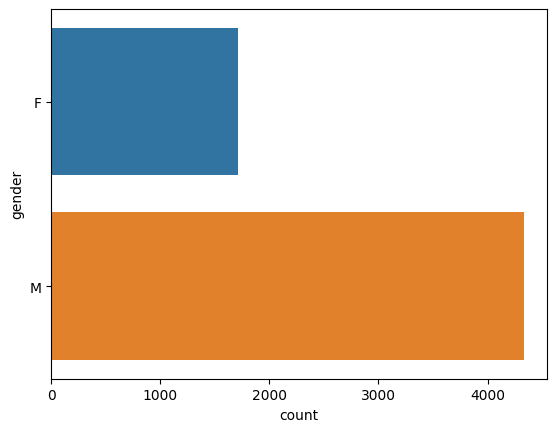

In [53]:
sns.countplot(data=users, y='gender')
plt.show()

### 연령대 빈도수

In [54]:
users.age.value_counts()

25    2096
35    1193
18    1103
45     550
50     496
56     380
1      222
Name: age, dtype: int64

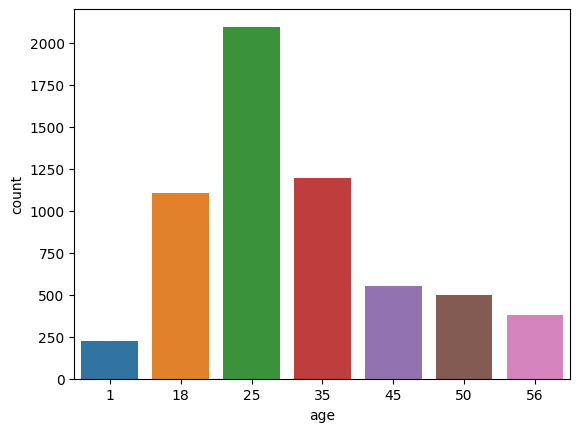

In [55]:
sns.countplot(data=users, x='age')
plt.show()

### 직업 빈도수

In [56]:
users.occupation.value_counts()

4     759
0     711
7     679
1     528
17    502
12    388
14    302
20    281
2     267
16    241
6     236
10    195
3     173
15    144
13    142
11    129
5     112
9      92
19     72
18     70
8      17
Name: occupation, dtype: int64

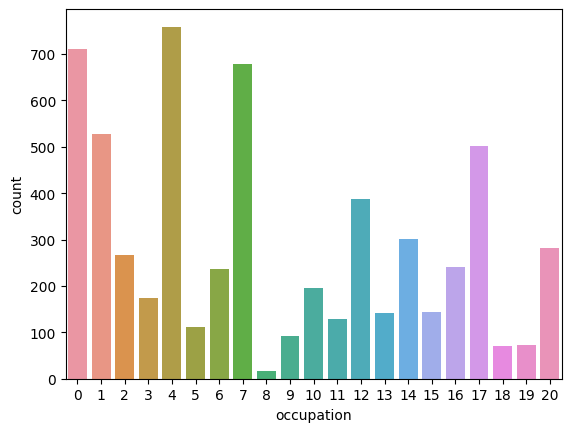

In [57]:
sns.countplot(data=users, x='occupation')
plt.show()